In [1]:
import pandas as pd
from func_educ_sup import *
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Selecciona el año de información a analizar
year=input("selecciona el año")

/tmp/ipykernel_24652/2094372603.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# URL del archivo RAR que quieres descargar
url_file = f'''https://datosabiertos.mineduc.cl/wp-content/uploads/2023/07/Titulados-Educacion-Superior-{year}.rar'''

# Nombre del archivo de destino
name_file = f'Titulados-Educacion-Superior-{year}.rar'

download_directory= f'datos/{year}/'

download_path=download_directory+name_file

result_directory=f'resultado/{year}/'

create_directory(download_directory)

create_directory(result_directory)


directory 'datos/2022/' eliminado.
directory 'datos/2022/' creado con éxito.
directory 'resultado/2022/' eliminado.
directory 'resultado/2022/' creado con éxito.


In [3]:
download_file(download_directory,url_file,name_file)
unrar_file(download_path,download_directory)

Descarga exitosa. El archivo se ha guardado en: datos/2022/Titulados-Educacion-Superior-2022.rar


In [4]:
directory_datos = os.listdir(download_directory)
file_csv = [archivo for archivo in directory_datos if archivo.endswith('.csv')]

In [5]:
df_educ_sup=load_first_csv(file_csv,download_directory)

El primer archivo CSV se ha cargado en un DataFrame.


In [6]:
# Filtra para las carreras profesionales
df_c_p=df_educ_sup[df_educ_sup['TIPO TÍTULO']=='Carreras Profesionales']

df_c_t=df_educ_sup[df_educ_sup['TIPO TÍTULO']=='Carreras Técnicas']

In [7]:
# Obtiene el top 10 de egresados por carreras para cada institución
df_top_c_p_i = df_c_p.groupby([ 'INSTITUCIÓN','CARRERA']).size().reset_index(name='EGRESADOS')
df_top_c_p_i = df_top_c_p_i.sort_values(by='EGRESADOS', ascending=False)
df_top_c_p_i=df_top_c_p_i.head(10).reset_index(drop=True)

In [8]:
# Obtiene el top 10 de egresados por carreras 

def get_top_10(df):
    df_result = df.groupby(['CARRERA']).size().reset_index(name='EGRESADOS')
    df_result = df_result.sort_values(by='EGRESADOS', ascending=False)
    df_result=df_result.head(10).reset_index(drop=True)
    return df_result

df_top_c_p=get_top_10(df_c_p)
df_top_c_t=get_top_10(df_c_t)

In [9]:
# Obtiene el df de egresados de carreras profesionales por región
df_c_p_r = df_c_p.groupby(['REGIÓN']).size().reset_index(name='EGRESADOS')
df_c_p_r = df_c_p_r.sort_values(by='EGRESADOS', ascending=False)
df_c_p_r=df_c_p_r.reset_index(drop=True)

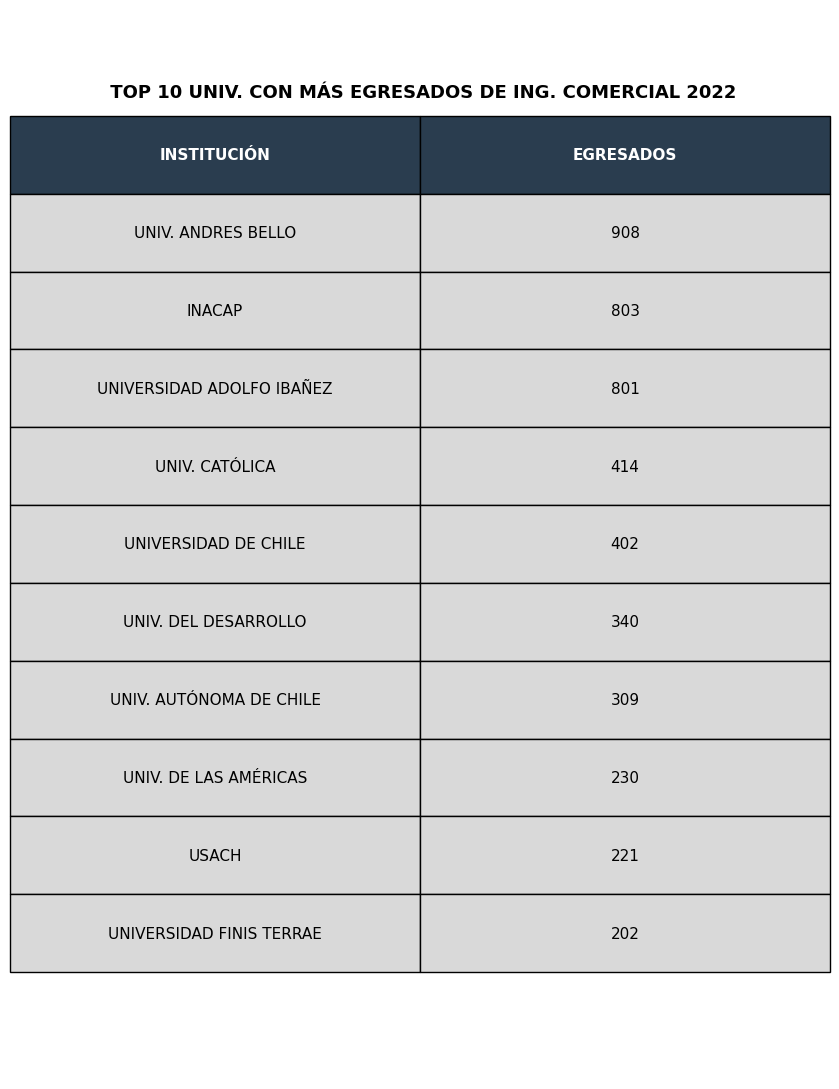

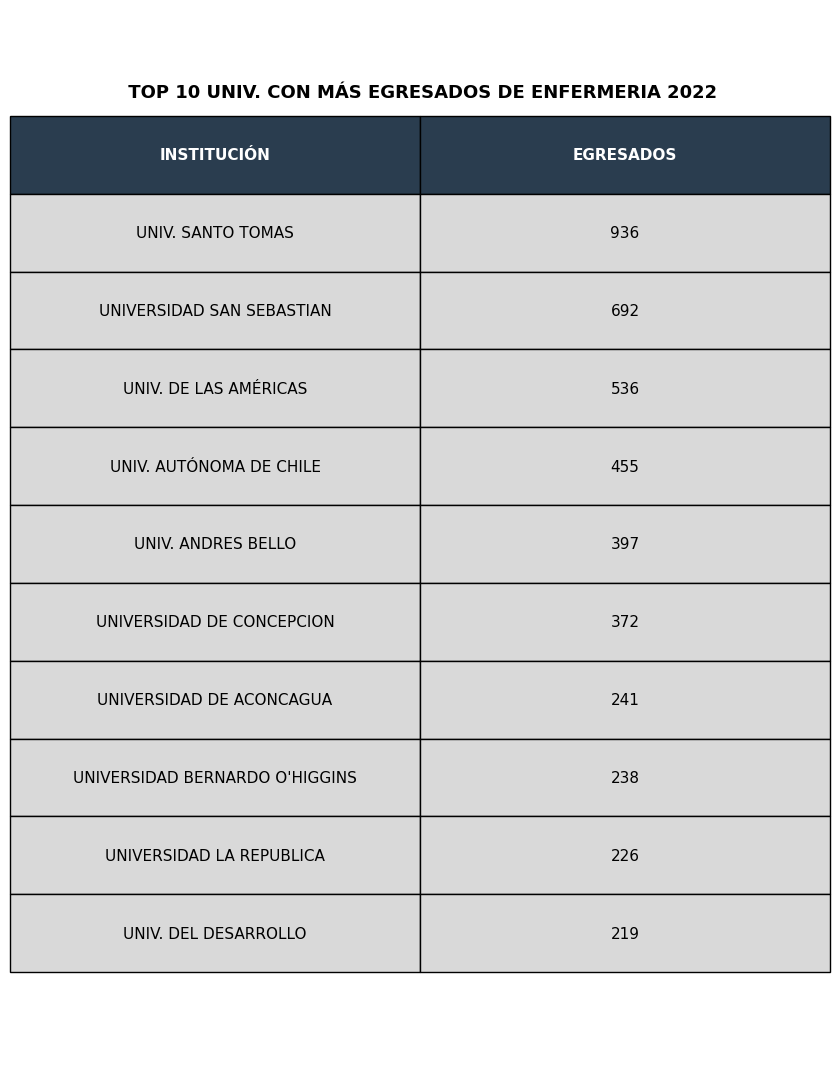

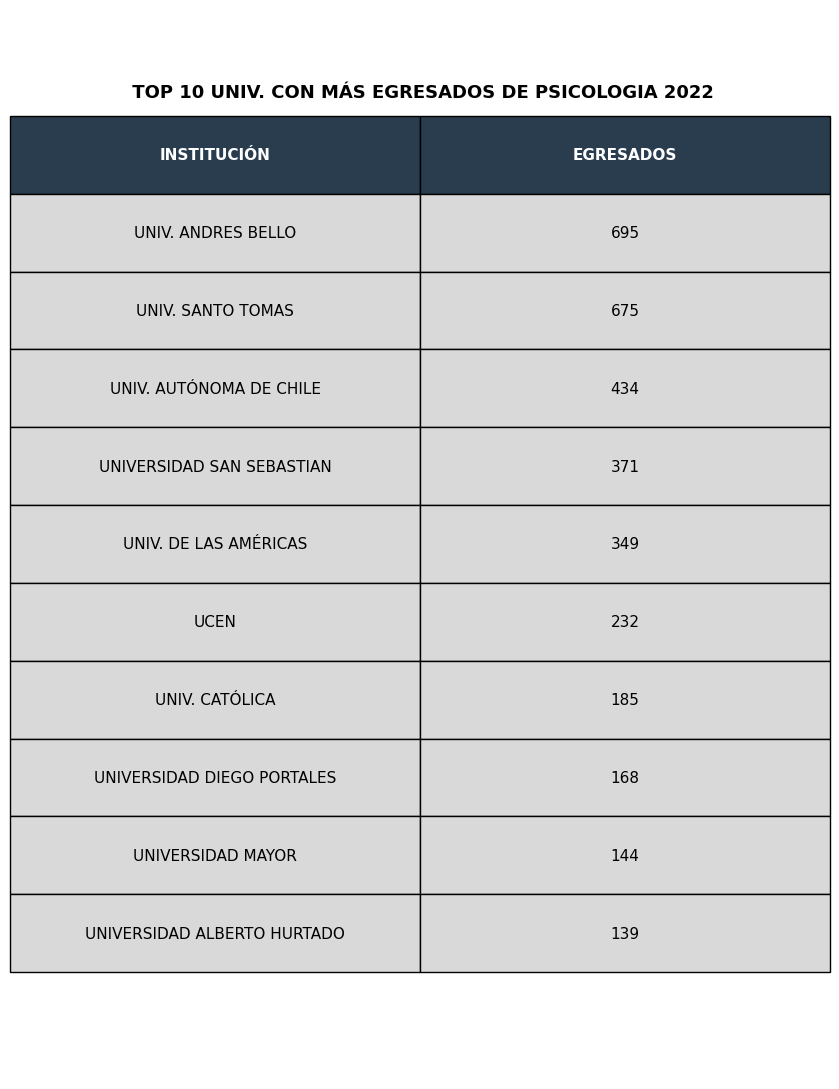

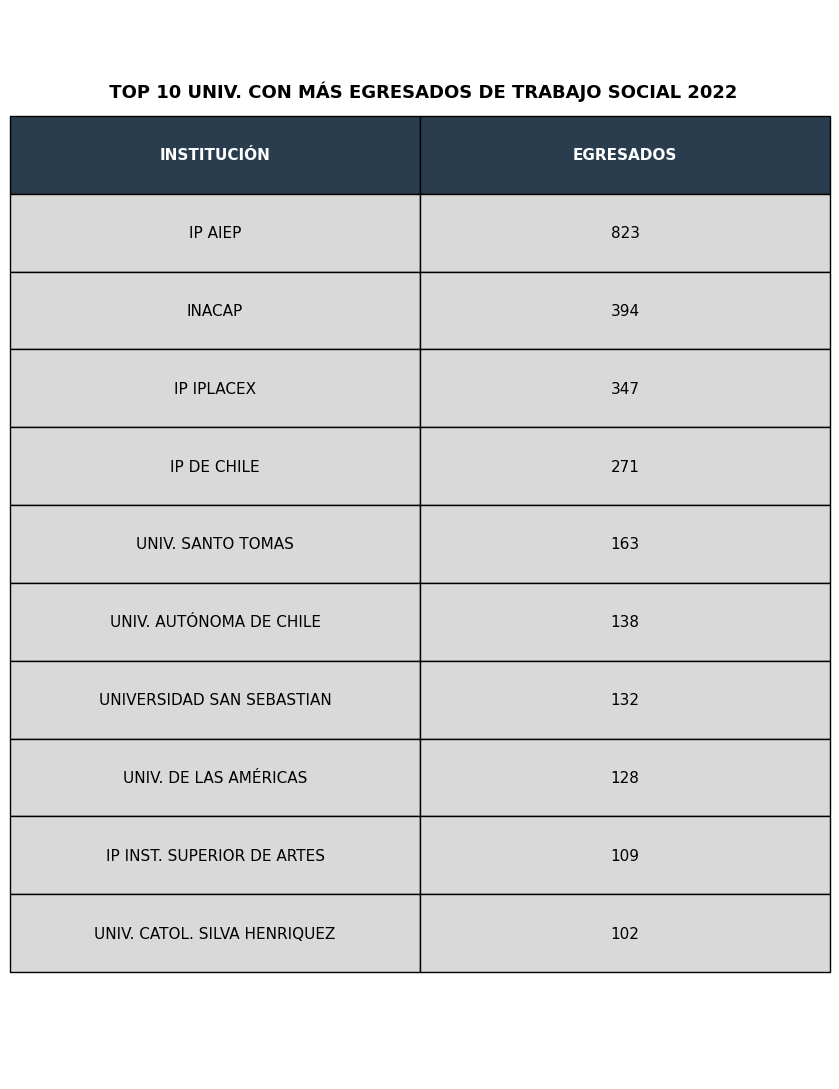

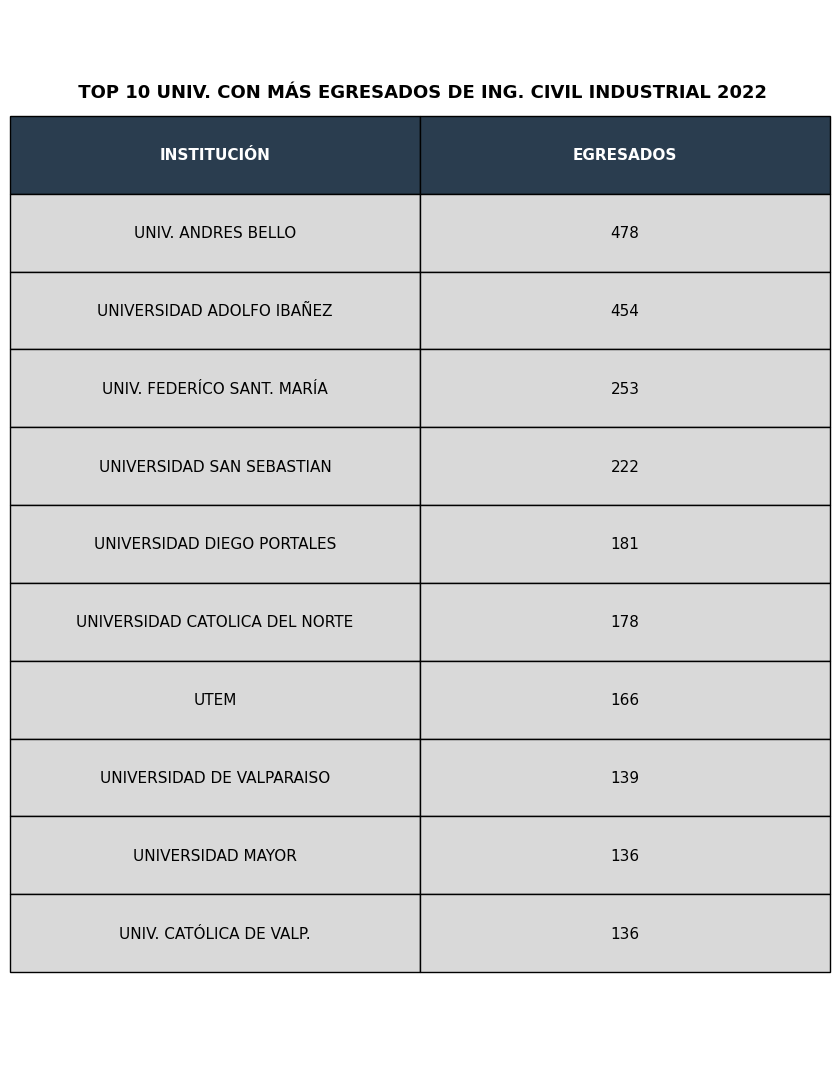

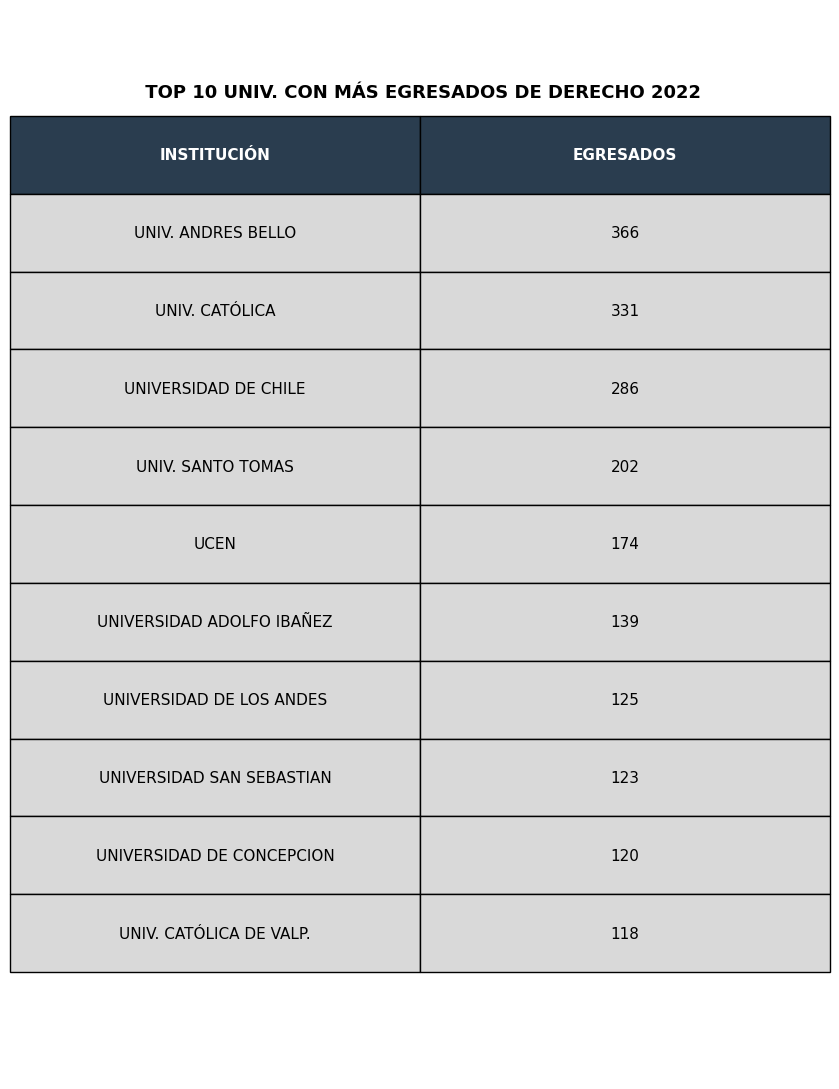

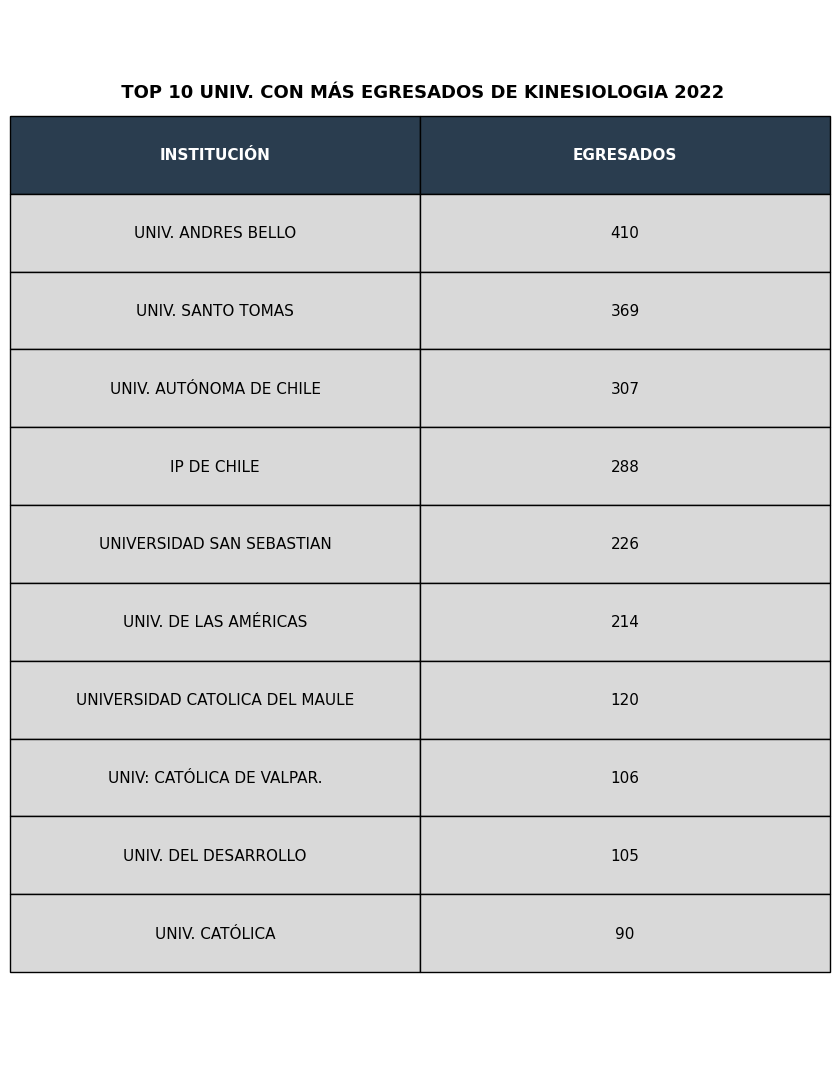

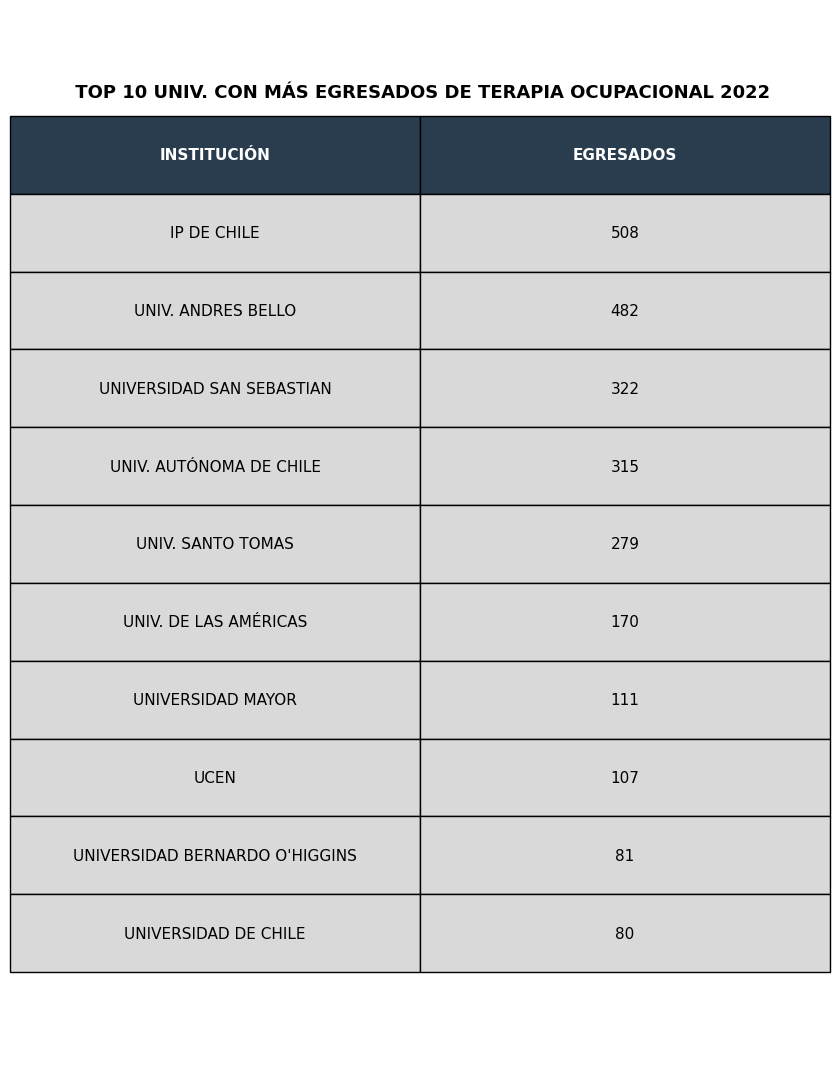

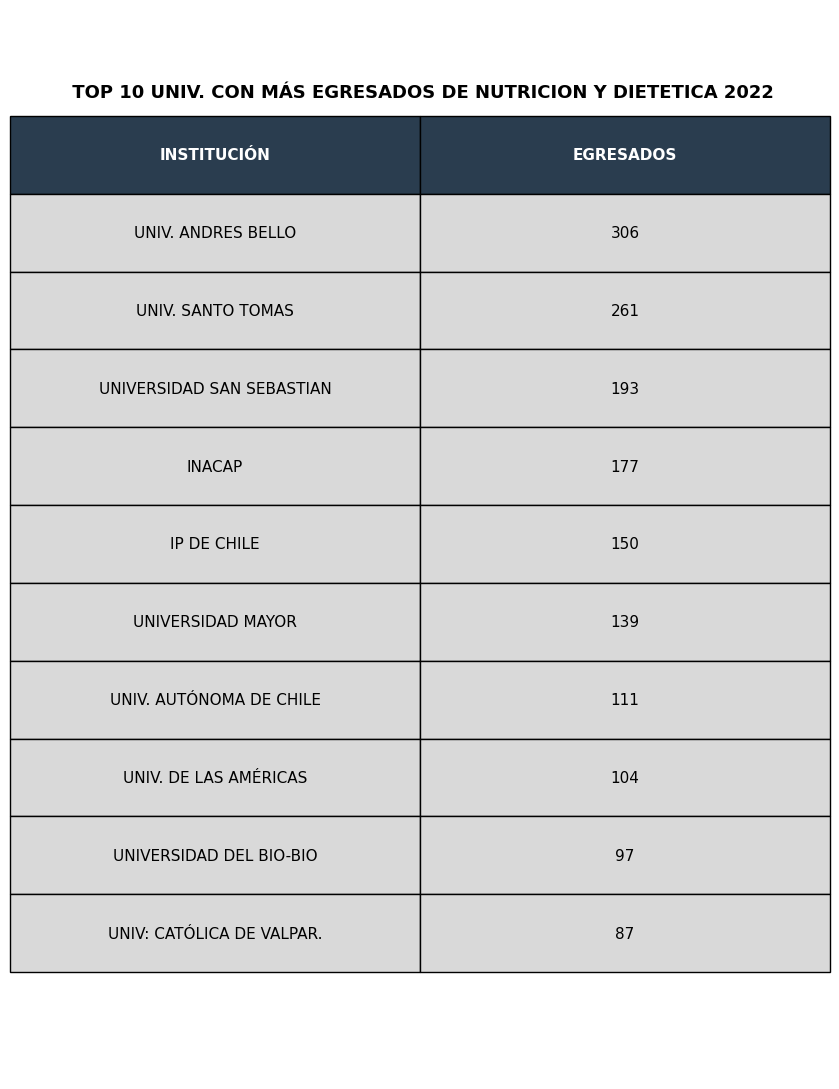

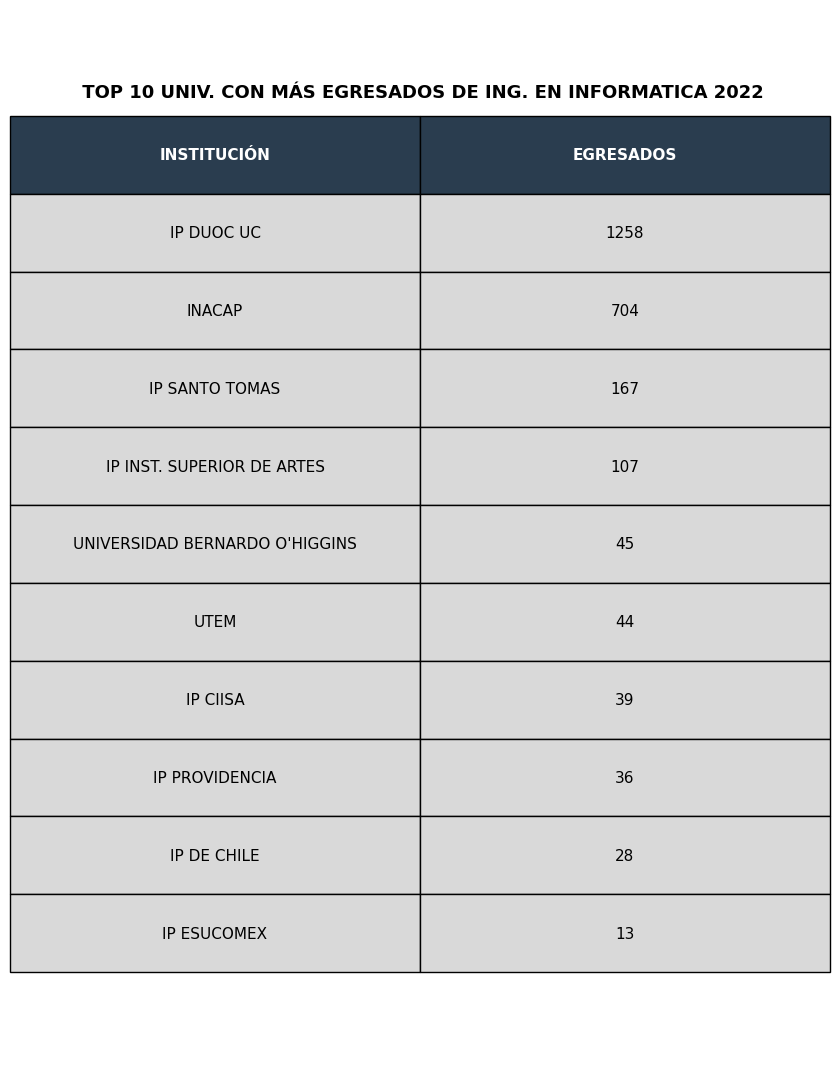

In [10]:
# Obtiene los 10 dfs por institución de las 10 carreras con más egresados
top_carr=df_top_c_p['CARRERA'].tolist()

df_plt_carr_list=[]
for carr in top_carr:
    df_carr=df_c_p[df_c_p['CARRERA']==carr]
    # Obtiene el top 10 de instituciones con mayor cantidad de egresados para cada carrera del top
    df_carr = df_carr.groupby([ 'INSTITUCIÓN']).size().reset_index(name='EGRESADOS')
    df_carr = df_carr.sort_values(by='EGRESADOS', ascending=False)
    df_carr=df_carr.head(10).reset_index(drop=True)
    table_carr= plt_table(df_carr,f'''01_top_carreras_{year}.pdf''',f''' TOP 10 UNIV. CON MÁS EGRESADOS DE {carr} {year}''',13,11)
    df_plt_carr_list.append(table_carr)

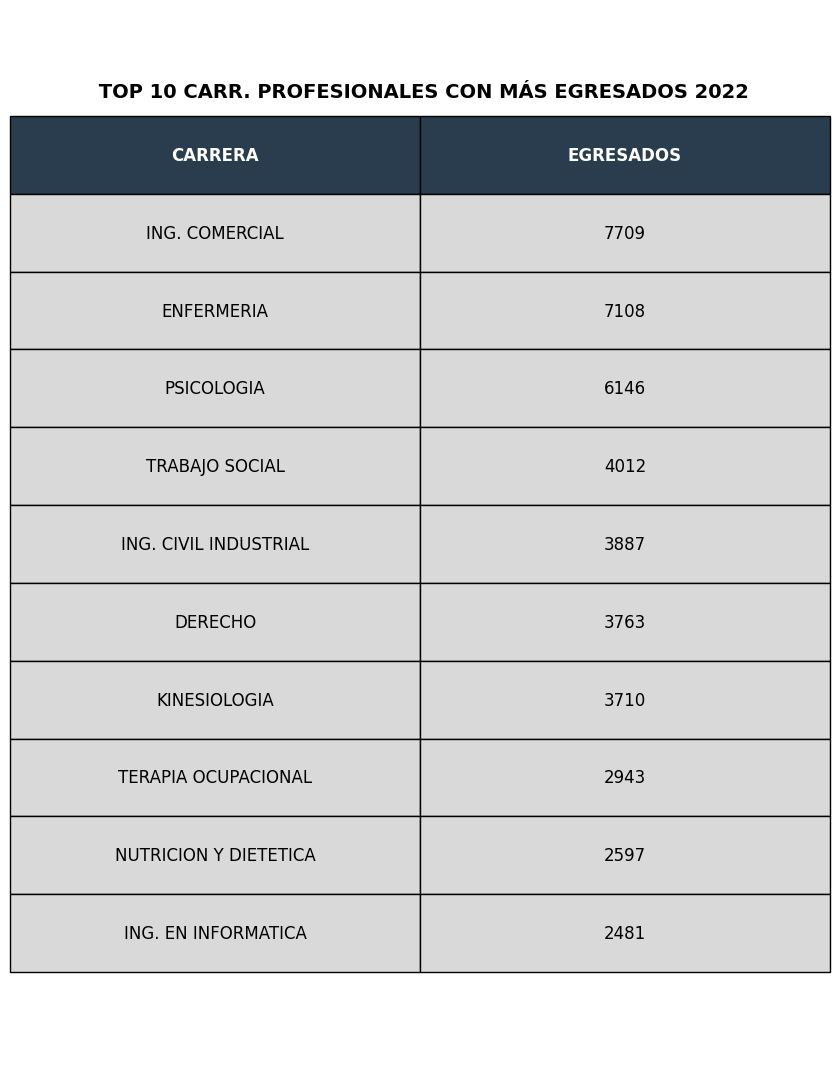

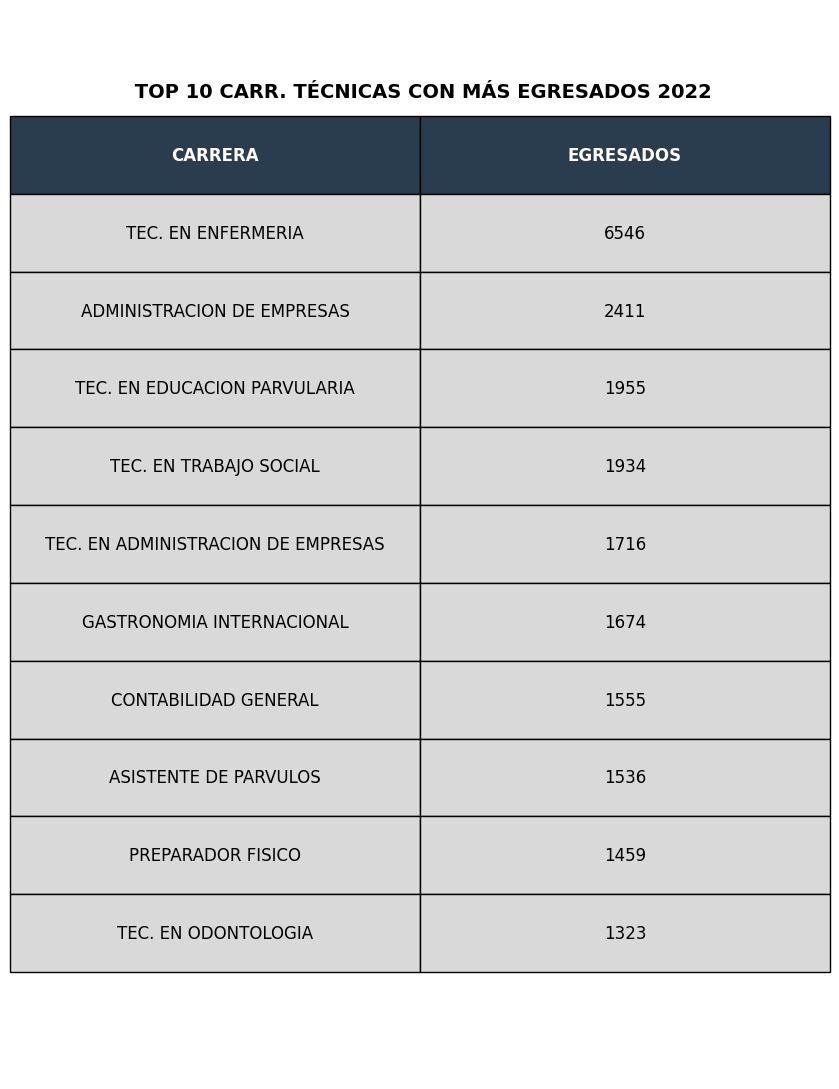

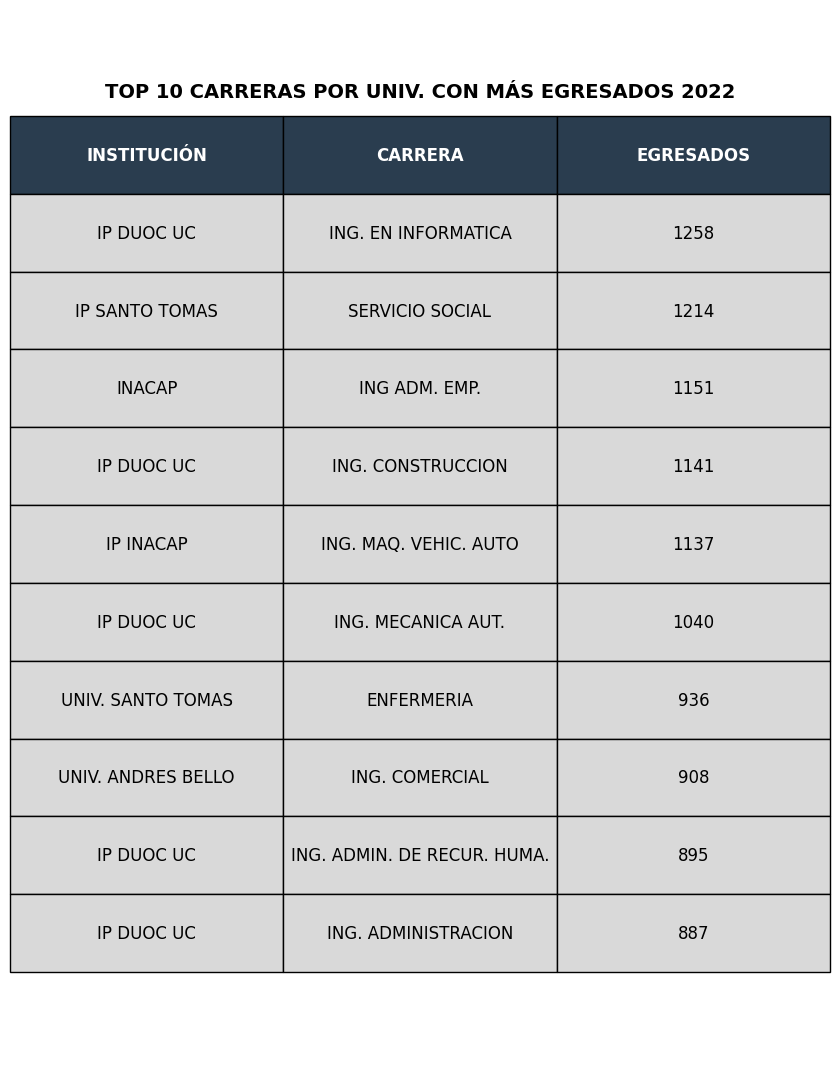

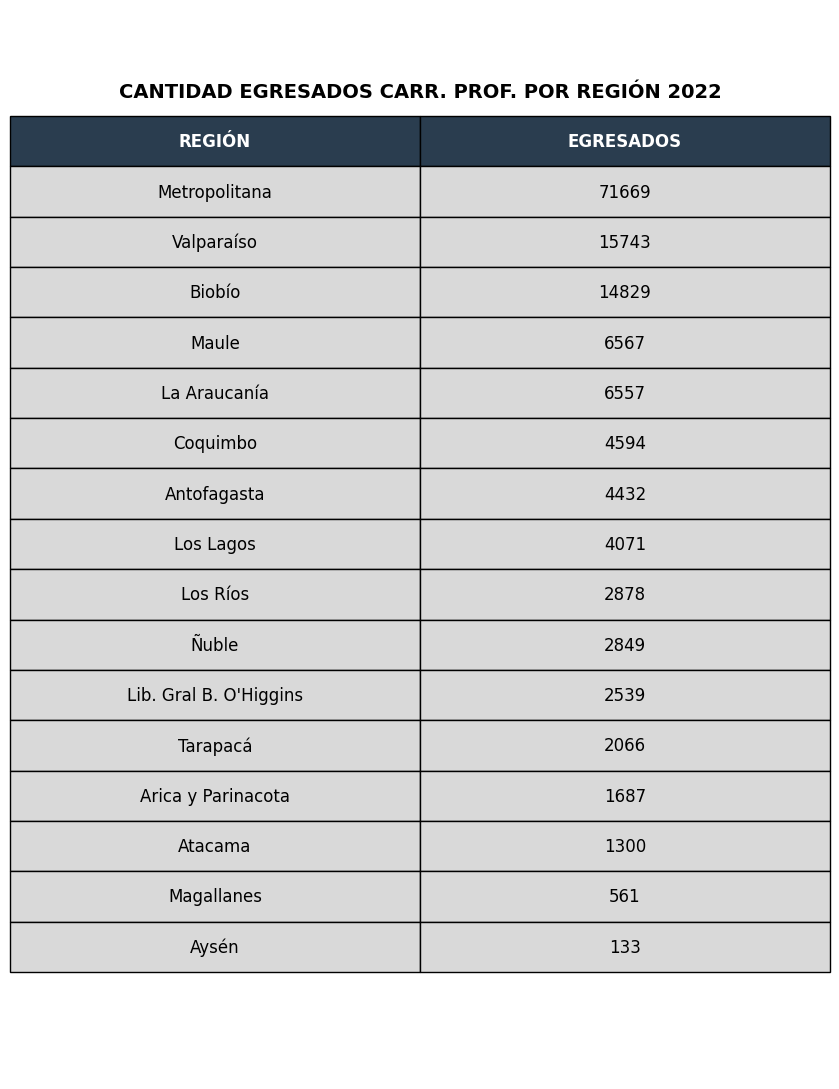

In [11]:

# Obtiene la tabla con el top de las 10 carreras profesionales con más egresados
table_top_c_p= plt_table(df_top_c_p,f'''01_top_carreras_{year}.pdf''',f''' TOP 10 CARR. PROFESIONALES CON MÁS EGRESADOS {year}''',14,12)

# Obtiene la tabla con el top de las 10 carreras técnicas con más egresados
table_top_c_t=plt_table(df_top_c_t,f'''01_top_carreras_{year}.pdf''',f''' TOP 10 CARR. TÉCNICAS CON MÁS EGRESADOS {year}''',14,12)

# Obtiene la tabla con las 10 carreras profesionales por instutución con más egresados
table_top_c_p_i= plt_table(df_top_c_p_i,f'''02_top_car_uni_{year}.pdf''',f'''TOP 10 CARRERAS POR UNIV. CON MÁS EGRESADOS {year}''',14,12)

# OBtiene la tabla con la cantidad de egresados por region
table_c_p_r= plt_table(df_c_p_r,f'''02_top_car_uni_{year}.pdf''',f'''CANTIDAD EGRESADOS CARR. PROF. POR REGIÓN {year}''',14,12)

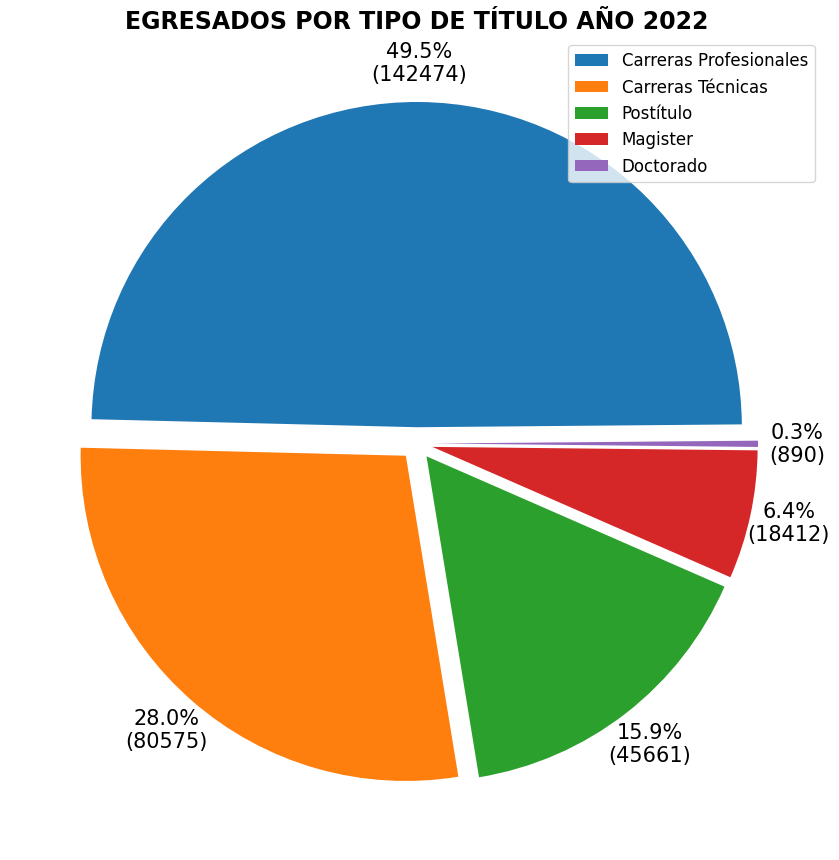

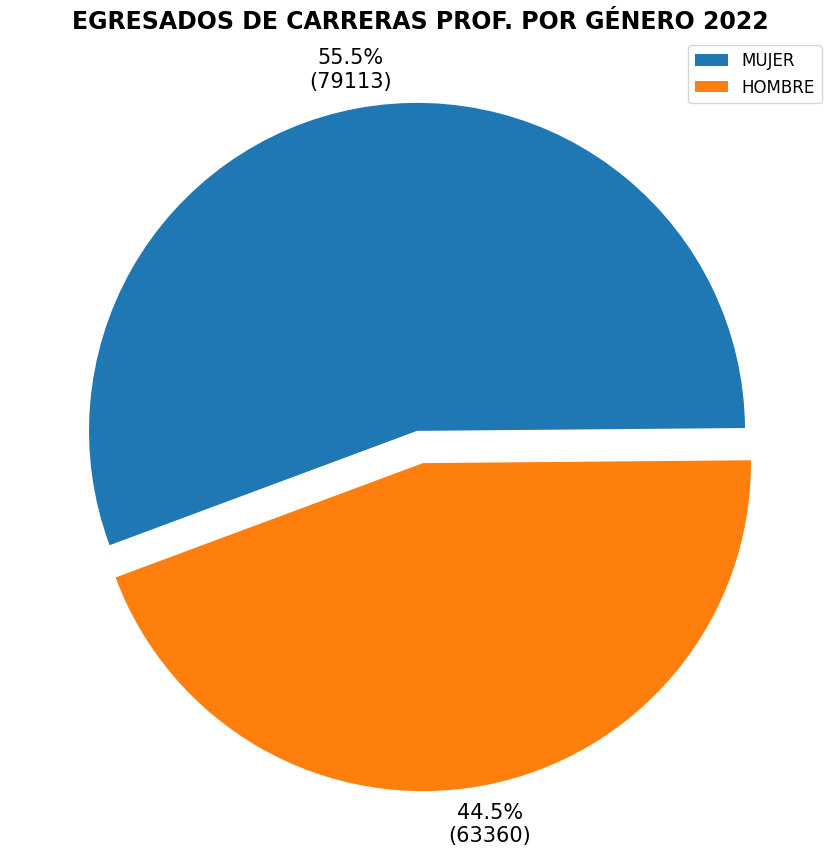

In [12]:

# Pie chart con el porcentaje por título obtenidos 
plt_tt=pie_chart(df_educ_sup['TIPO TÍTULO'],f'''03_grafico_titulo_{year}.pdf''',f'''EGRESADOS POR TIPO DE TÍTULO AÑO {year}''',17,12)


# Pie chart con el porcentaje por género que obtuvo un título
plt_g=pie_chart(df_c_p['GÉNERO'],f'''04_grafico_genero_{year}.pdf''',f'''EGRESADOS DE CARRERAS PROF. POR GÉNERO {year}''',17,12)


In [13]:
# Listado de gráficos y tablas a guardar en el pdf
plt_list = [table_top_c_p,table_top_c_p_i,table_top_c_t,plt_tt,plt_g,table_c_p_r]+df_plt_carr_list

result_file=f'resumen_educ_sup_{year}.pdf'
result_path=result_directory+result_file
pdf = PdfPages(result_path)

# Guardar cada gráfico en el PDF
for i, graf in enumerate(plt_list):
    pdf.savefig(graf)
    plt.close(graf)  # Cerrar el gráfico actual para liberar memoria

# Cerrar el objeto PdfPages
pdf.close()

print(f"Los gráficos se han guardado en '{result_path}'")

Los gráficos se han guardado en 'resultado/2022/resumen_educ_sup_2022.pdf'
